# Unit4 Document Metadata Exploration

Exploratory analysis of REPINV and REPTEC documents from Unit4 API.

**Purpose:** Understand document structure, patterns, and characteristics before implementing Unit4Sync integration.

**Data Sources:**
- `repinv_docs_metadata.csv` - REPINV document metadata
- `reptec_docs_metadata.csv` - REPTEC document metadata

In [15]:
!pip install seaborn

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [17]:
import json
import pandas as pd
from pathlib import Path
from typing import List, Dict, Any

def flatten_dict(d: Dict[str, Any], parent_key: str = '', sep: str = '_') -> Dict[str, Any]:
    """
    Flattens nested dictionaries for CSV export
    """
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            # Convert lists to comma-separated strings
            items.append((new_key, ','.join(str(x) for x in v) if v else ''))
        else:
            items.append((new_key, v))
    return dict(items)


def load_json_response(json_file: str) -> pd.DataFrame:
    """
    Loads JSON response file and extracts all metadata from items,
    flattening nested structures
    """
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    items = data.get('items', [])
    flattened_items = [flatten_dict(item) for item in items]
    
    return pd.DataFrame(flattened_items)


def create_complete_metadata_csv(json_file: str, output_csv: str) -> bool:
    """
    Creates complete metadata CSV from JSON response file
    Includes ALL fields without exception
    """
    try:
        df = load_json_response(json_file)
        df.to_csv(output_csv, index=False, encoding='utf-8')
        print(f"✓ Complete metadata CSV created: {output_csv}")
        print(f"  - Fields: {len(df.columns)}")
        print(f"  - Rows: {len(df)}")
        print(f"  - Columns: {', '.join(df.columns[:10])}{'...' if len(df.columns) > 10 else ''}")
        return True
    except Exception as e:
        print(f"✗ Error creating CSV: {e}")
        return False


# Create complete metadata CSVs from JSON responses
print("=" * 70)
print("GENERATING COMPLETE METADATA CSVs FROM JSON RESPONSES")
print("=" * 70)

create_complete_metadata_csv('repinv_docs_response.json', 'repinv_complete_metadata.csv')
print()
create_complete_metadata_csv('reptec_docs_response.json', 'reptec_complete_metadata.csv')
print()

# Load and display summary
repinv_complete = pd.read_csv('repinv_complete_metadata.csv')
reptec_complete = pd.read_csv('reptec_complete_metadata.csv')

print(f"\nRepINV Complete Metadata: {len(repinv_complete)} rows × {len(repinv_complete.columns)} columns")
print(f"RepTEC Complete Metadata: {len(reptec_complete)} rows × {len(reptec_complete.columns)} columns")
print(f"\nTotal unique fields: {len(set(repinv_complete.columns) | set(reptec_complete.columns))}")

GENERATING COMPLETE METADATA CSVs FROM JSON RESPONSES
✓ Complete metadata CSV created: repinv_complete_metadata.csv
  - Fields: 14
  - Rows: 50
  - Columns: companyId, docType, mimeType, id, status, revisionNo, fileName, checkoutUserId, lastUpdate_updatedAt, lastUpdate_updatedBy...

✓ Complete metadata CSV created: reptec_complete_metadata.csv
  - Fields: 14
  - Rows: 50
  - Columns: companyId, docType, mimeType, id, status, revisionNo, fileName, checkoutUserId, lastUpdate_updatedAt, lastUpdate_updatedBy...


RepINV Complete Metadata: 50 rows × 14 columns
RepTEC Complete Metadata: 50 rows × 14 columns

Total unique fields: 14


## 1. Load Data

In [18]:
# Load metadata CSVs
repinv_df = pd.read_csv('repinv_docs_metadata.csv')
reptec_df = pd.read_csv('reptec_docs_metadata.csv')

# Add docType column for combined analysis
repinv_df['docType'] = 'REPINV'
reptec_df['docType'] = 'REPTEC'

# Combine datasets
all_docs = pd.concat([repinv_df, reptec_df], ignore_index=True)

print(f"REPINV documents: {len(repinv_df)}")
print(f"REPTEC documents: {len(reptec_df)}")
print(f"Total documents: {len(all_docs)}")

REPINV documents: 50
REPTEC documents: 50
Total documents: 100


In [19]:
# Preview data
all_docs.head()

,id,fileName,mimeType,docType,companyId,status,revisionNo,updatedAt,updatedBy
0,a258f495-cb5d-4908-9899-12782b040c2f,(1) INFORME TECNICO FINAL INPANDES 1271-EC00 u...,application/pdf,REPINV,P2,N,1,2018-07-10T22:31:59.000,CIP-GC1
1,e67bfe25-b63e-49b6-8fc6-1b79943a70df,(2) 1271 INPANDES Informe Financiero FInal Jun...,application/pdf,REPINV,P2,N,1,2018-07-10T22:32:28.000,CIP-GC1
2,33a2caab-1582-4b79-9fa8-deeb5399f00e,(2.1) 1271 INPANDES Transacciones Final Jun18.pdf,application/pdf,REPINV,P2,N,1,2018-07-10T22:32:50.000,CIP-GC1
3,638b74fb-2a49-4d99-9210-1a849c9f322e,(2.2) Informe Financiero Final Proyecto INPAND...,application/pdf,REPINV,P2,N,1,2018-07-10T22:33:00.000,CIP-GC1
4,1064cec8-bd06-42ea-9bf6-0a8211c4da7a,(3) Informe Verficación INPANDES 1271-EC00 (Re...,application/pdf,REPINV,P2,N,1,2018-07-10T22:33:18.000,CIP-GC1


In [20]:
# Data info
all_docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    object
 1   fileName    100 non-null    object
 2   mimeType    100 non-null    object
 3   docType     100 non-null    object
 4   companyId   100 non-null    object
 5   status      100 non-null    object
 6   revisionNo  100 non-null    int64 
 7   updatedAt   100 non-null    object
 8   updatedBy   100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


## 2. Basic Statistics

In [21]:
# Summary statistics
print("=== Document Type Distribution ===")
print(all_docs['docType'].value_counts())
print("\n=== Company ID Distribution ===")
print(all_docs['companyId'].value_counts())
print("\n=== Status Distribution ===")
print(all_docs['status'].value_counts())
print("\n=== Revision Numbers ===")
print(all_docs['revisionNo'].value_counts().head(10))

=== Document Type Distribution ===
docType
REPINV    50
REPTEC    50
Name: count, dtype: int64

=== Company ID Distribution ===
companyId
P2    100
Name: count, dtype: int64

=== Status Distribution ===
status
N    100
Name: count, dtype: int64

=== Revision Numbers ===
revisionNo
1    100
Name: count, dtype: int64


## 3. File Type Analysis

=== MimeType Distribution ===
mimeType
application/pdf                                                            76
application/vnd.openxmlformats-officedocument.wordprocessingml.document    19
application/vnd.openxmlformats-officedocument.spreadsheetml.sheet           3
application/msword                                                          2
Name: count, dtype: int64


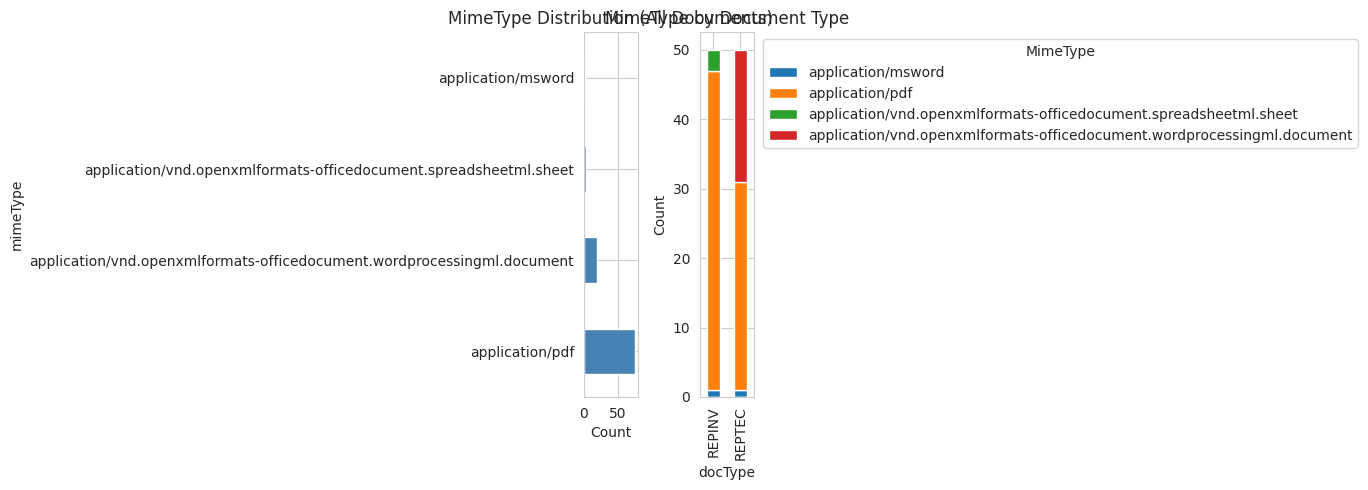

In [22]:
# MimeType distribution
print("=== MimeType Distribution ===")
mimetype_counts = all_docs['mimeType'].value_counts()
print(mimetype_counts)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Overall distribution
mimetype_counts.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('MimeType Distribution (All Documents)')
ax1.set_xlabel('Count')

# By docType
doctype_mimetype = all_docs.groupby(['docType', 'mimeType']).size().unstack(fill_value=0)
doctype_mimetype.plot(kind='bar', ax=ax2, stacked=True)
ax2.set_title('MimeType by Document Type')
ax2.set_ylabel('Count')
ax2.legend(title='MimeType', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

=== File Extensions ===
extension
pdf     76
docx    19
xlsx     3
doc      2
Name: count, dtype: int64


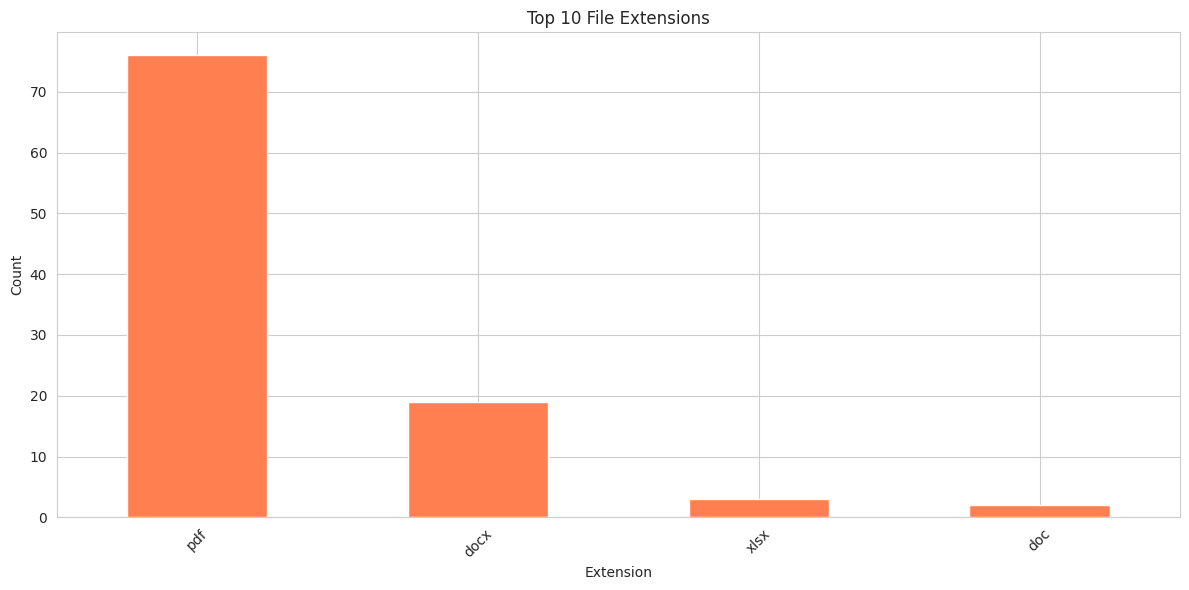

In [23]:
# File extensions from fileName
all_docs['extension'] = all_docs['fileName'].str.extract(r'\.(\w+)$')

print("=== File Extensions ===")
extension_counts = all_docs['extension'].value_counts()
print(extension_counts)

# Visualize
extension_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 File Extensions')
plt.xlabel('Extension')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Temporal Analysis

In [24]:
# Convert updatedAt to datetime
all_docs['updatedAt'] = pd.to_datetime(all_docs['updatedAt'], errors='coerce')

# Extract temporal features
all_docs['year'] = all_docs['updatedAt'].dt.year
all_docs['month'] = all_docs['updatedAt'].dt.month
all_docs['year_month'] = all_docs['updatedAt'].dt.to_period('M')

print("=== Temporal Range ===")
print(f"Earliest update: {all_docs['updatedAt'].min()}")
print(f"Latest update: {all_docs['updatedAt'].max()}")
print(f"\nYears covered: {sorted(all_docs['year'].dropna().unique())}")

=== Temporal Range ===
Earliest update: 2016-09-14 04:58:50
Latest update: 2026-02-02 13:50:01

Years covered: [np.int32(2016), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025), np.int32(2026)]


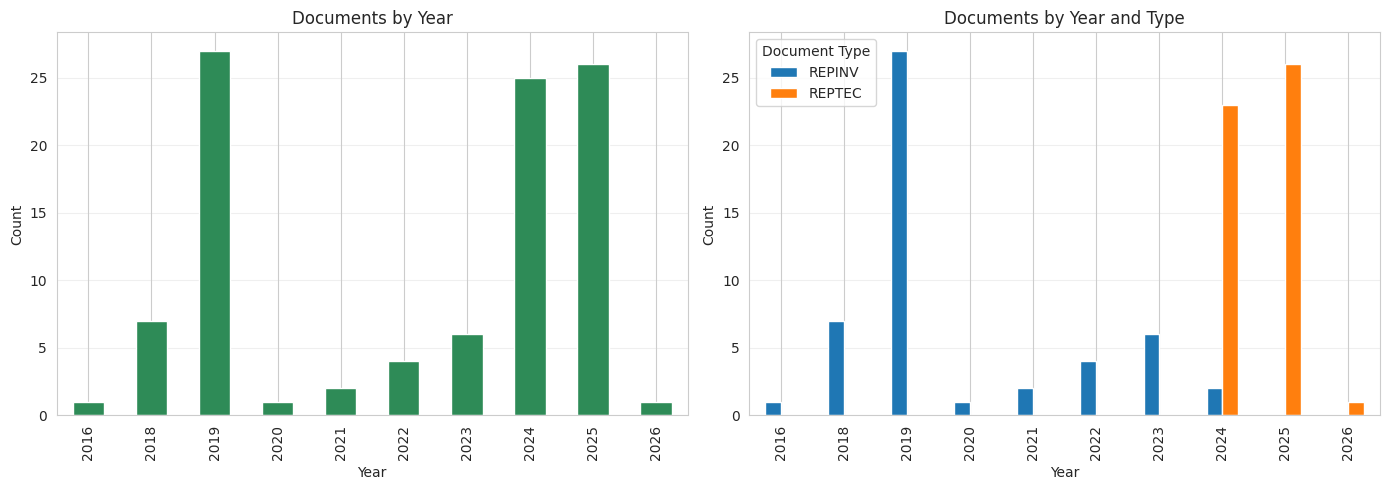

In [25]:
# Documents by year
year_counts = all_docs['year'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Overall trend
year_counts.plot(kind='bar', ax=ax1, color='seagreen')
ax1.set_title('Documents by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)

# By docType
year_doctype = all_docs.groupby(['year', 'docType']).size().unstack(fill_value=0)
year_doctype.plot(kind='bar', ax=ax2, stacked=False)
ax2.set_title('Documents by Year and Type')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.legend(title='Document Type')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

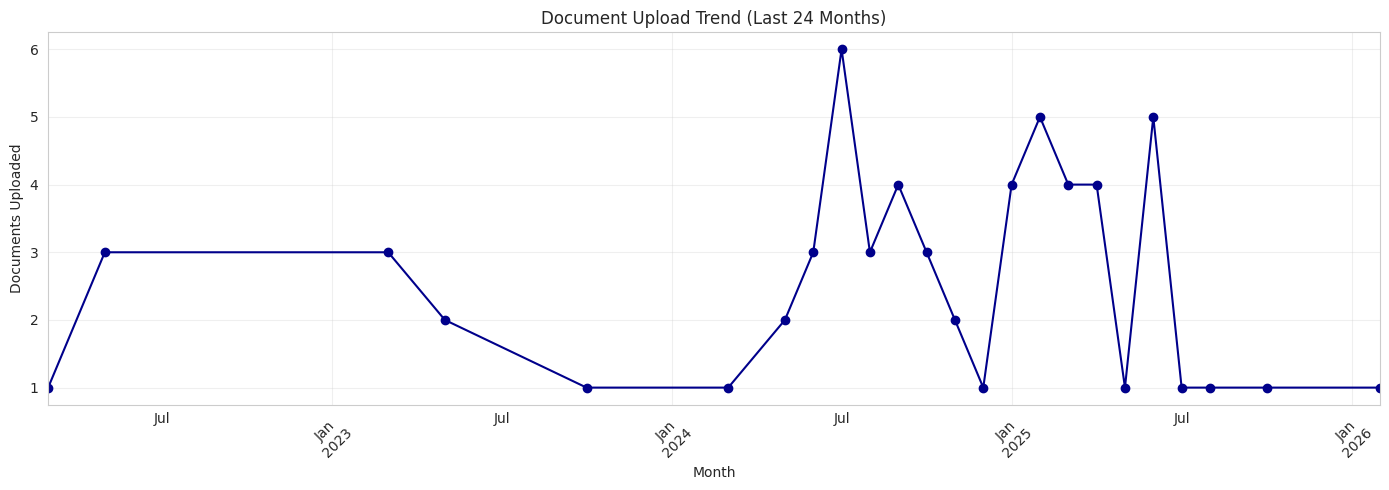

In [26]:
# Monthly trend (recent 24 months)
monthly_counts = all_docs['year_month'].value_counts().sort_index().tail(24)

plt.figure(figsize=(14, 5))
monthly_counts.plot(kind='line', marker='o', color='darkblue')
plt.title('Document Upload Trend (Last 24 Months)')
plt.xlabel('Month')
plt.ylabel('Documents Uploaded')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. User Activity

=== Top 10 Most Active Users ===
updatedBy
JRAMON        53
MARCOPINTO    39
CIP-GC1        8
Name: count, dtype: int64


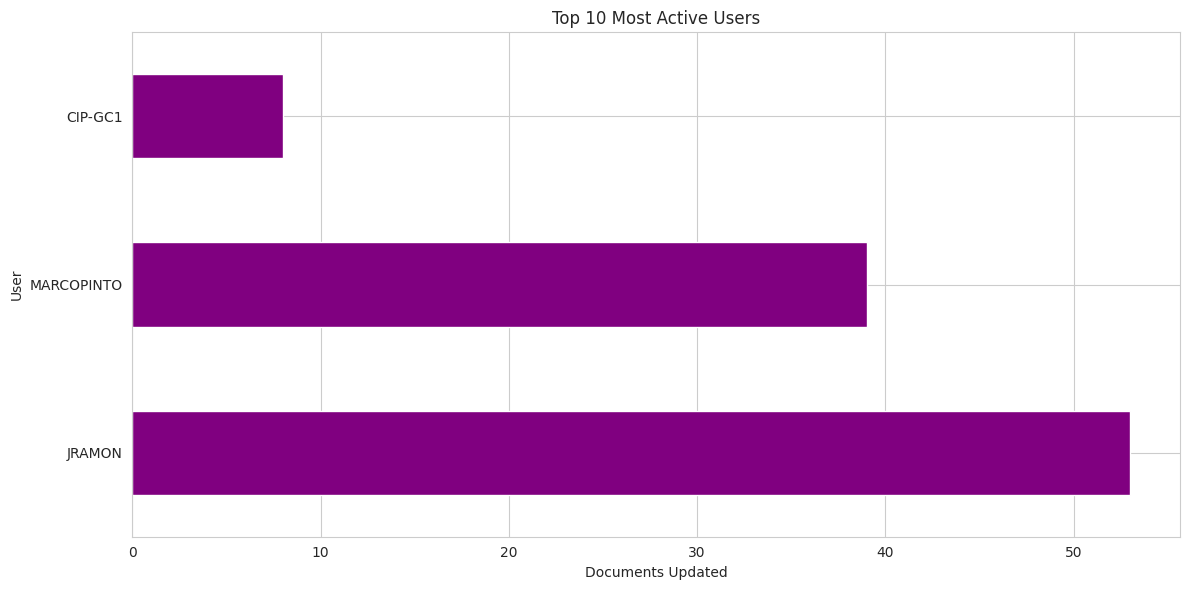

In [27]:
# Top users by document count
print("=== Top 10 Most Active Users ===")
user_counts = all_docs['updatedBy'].value_counts().head(10)
print(user_counts)

# Visualize
user_counts.plot(kind='barh', color='purple')
plt.title('Top 10 Most Active Users')
plt.xlabel('Documents Updated')
plt.ylabel('User')
plt.tight_layout()
plt.show()

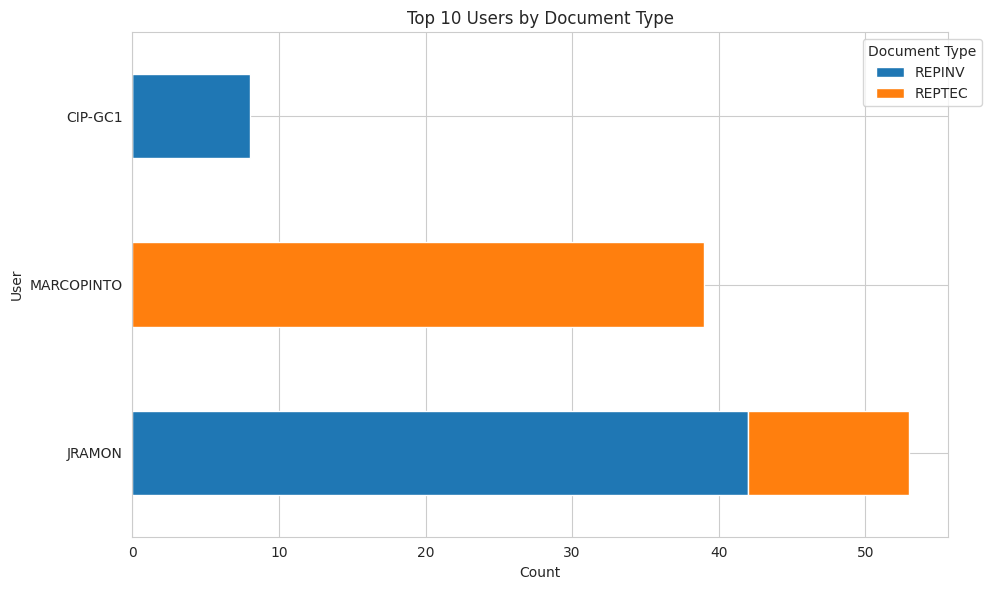

In [28]:
# User activity by docType
user_doctype = all_docs.groupby(['updatedBy', 'docType']).size().unstack(fill_value=0)
top_users = user_doctype.sum(axis=1).nlargest(10).index

user_doctype.loc[top_users].plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Top 10 Users by Document Type')
plt.xlabel('Count')
plt.ylabel('User')
plt.legend(title='Document Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 6. Status & Revision Analysis

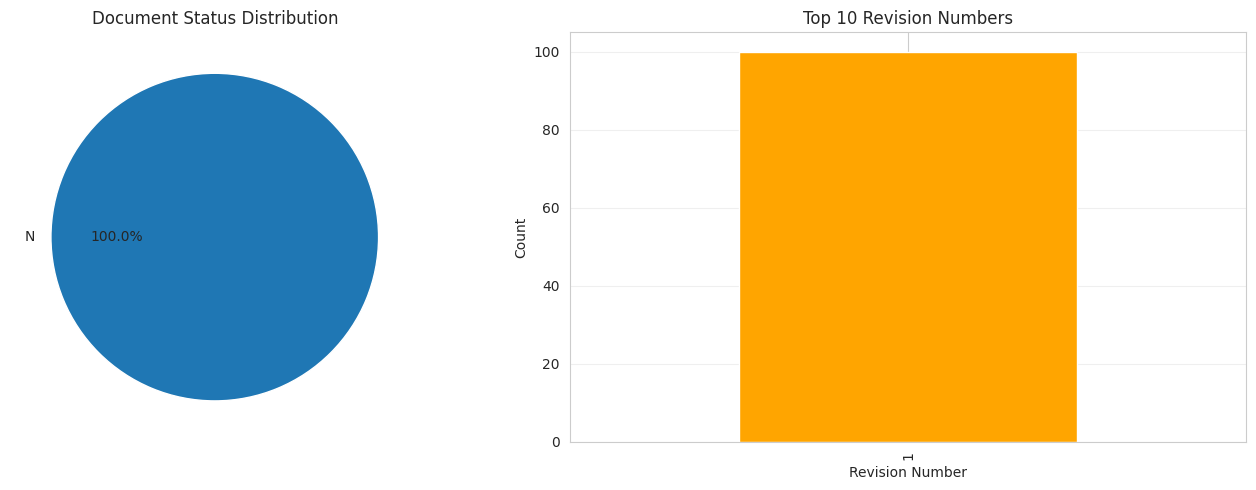

In [29]:
# Status distribution by docType
status_doctype = all_docs.groupby(['status', 'docType']).size().unstack(fill_value=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Status distribution
all_docs['status'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Document Status Distribution')
ax1.set_ylabel('')

# Revision numbers
all_docs['revisionNo'].value_counts().head(10).plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Top 10 Revision Numbers')
ax2.set_xlabel('Revision Number')
ax2.set_ylabel('Count')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Document Naming Patterns

In [30]:
# Analyze fileName patterns
print("=== Sample File Names ===")
print(all_docs[['fileName', 'docType', 'mimeType']].sample(10))

# Check for common prefixes/patterns
all_docs['name_prefix'] = all_docs['fileName'].str.extract(r'^([A-Z0-9]+)')
prefix_counts = all_docs['name_prefix'].value_counts().head(10)

print("\n=== Top 10 Filename Prefixes ===")
print(prefix_counts)

=== Sample File Names ===
                                             fileName docType  \
55  1453-SFSA - TAP5 Phase II Annual & Final Repor...  REPTEC   
88  1517-CIMM January Monthly Partner Narrative re...  REPTEC   
40              07.07 Boite a images Consommation.pdf  REPINV   
46      08.01 Consultancy Programme  Nov Dec 2018.doc  REPINV   
83               1514-FFSL Farmworks Final report.pdf  REPTEC   
50                         0.Rapport Avancement 6.pdf  REPTEC   
56  1464-USAI - GBPP Statement of Activities (Apr2...  REPTEC   
85  1515-IITA PROSSIVA CIP Y2 Report May-October 2...  REPTEC   
90  1517-CIMM May Monthly Report - CIP Progress re...  REPTEC   
30        06.2 Seed Potato Producer Manual_EN_V12.pdf  REPINV   

                                             mimeType  
55                                    application/pdf  
88  application/vnd.openxmlformats-officedocument....  
40                                    application/pdf  
46                                

## 8. Summary for Integration Planning

In [31]:
# Generate summary report
summary = {
    'Total Documents': len(all_docs),
    'REPINV Count': len(repinv_df),
    'REPTEC Count': len(reptec_df),
    'Unique Users': all_docs['updatedBy'].nunique(),
    'File Types': all_docs['mimeType'].nunique(),
    'Most Common MimeType': all_docs['mimeType'].mode()[0],
    'Most Common Extension': all_docs['extension'].mode()[0] if 'extension' in all_docs else 'N/A',
    'Date Range': f"{all_docs['updatedAt'].min()} to {all_docs['updatedAt'].max()}",
    'Avg Revision No': all_docs['revisionNo'].mean(),
    'Most Active User': all_docs['updatedBy'].mode()[0],
}

print("="*60)
print("UNIT4 DOCUMENT METADATA SUMMARY")
print("="*60)
for key, value in summary.items():
    print(f"{key:25s}: {value}")
print("="*60)

UNIT4 DOCUMENT METADATA SUMMARY
Total Documents          : 100
REPINV Count             : 50
REPTEC Count             : 50
Unique Users             : 3
File Types               : 4
Most Common MimeType     : application/pdf
Most Common Extension    : pdf
Date Range               : 2016-09-14 04:58:50 to 2026-02-02 13:50:01
Avg Revision No          : 1.0
Most Active User         : JRAMON


In [32]:
# Integration recommendations
print("\n=== INTEGRATION RECOMMENDATIONS ===")
print("\n1. File Type Support:")
print(f"   - Primary types: {', '.join(all_docs['mimeType'].value_counts().head(3).index)}")
print(f"   - Total unique types: {all_docs['mimeType'].nunique()}")

print("\n2. Document Processing:")
pdf_count = all_docs[all_docs['mimeType'] == 'application/pdf'].shape[0]
docx_count = all_docs[all_docs['mimeType'].str.contains('word', na=False)].shape[0]
xlsx_count = all_docs[all_docs['mimeType'].str.contains('sheet', na=False)].shape[0]
print(f"   - PDFs: {pdf_count} ({pdf_count/len(all_docs)*100:.1f}%)")
print(f"   - Word docs: {docx_count} ({docx_count/len(all_docs)*100:.1f}%)")
print(f"   - Excel sheets: {xlsx_count} ({xlsx_count/len(all_docs)*100:.1f}%)")

print("\n3. Sync Strategy:")
print(f"   - Start with REPINV (larger dataset: {len(repinv_df)} docs)")
print(f"   - Then add REPTEC ({len(reptec_df)} docs)")
print(f"   - Consider pagination with limit={min(100, len(all_docs))} per request")

print("\n4. Metadata Tracking:")
print(f"   - Track updatedAt for incremental sync")
print(f"   - Monitor revisionNo for version control")
print(f"   - Use updatedBy for provenance")


=== INTEGRATION RECOMMENDATIONS ===

1. File Type Support:
   - Primary types: application/pdf, application/vnd.openxmlformats-officedocument.wordprocessingml.document, application/vnd.openxmlformats-officedocument.spreadsheetml.sheet
   - Total unique types: 4

2. Document Processing:
   - PDFs: 76 (76.0%)
   - Word docs: 21 (21.0%)
   - Excel sheets: 3 (3.0%)

3. Sync Strategy:
   - Start with REPINV (larger dataset: 50 docs)
   - Then add REPTEC (50 docs)
   - Consider pagination with limit=100 per request

4. Metadata Tracking:
   - Track updatedAt for incremental sync
   - Monitor revisionNo for version control
   - Use updatedBy for provenance
